In [30]:
import os
import pandas as pd
import numpy as np
import seaborn as sns
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.metrics import f1_score
import matplotlib.pyplot as plt
import plotly.offline as py
from tensorflow.keras.losses import BinaryCrossentropy
from keras import backend as K

os.chdir("c:\\Users\\denis\\OneDrive\\Desktop\\Programming\\Python\\Toxicity_project")

In [2]:
df = pd.read_csv("toxicity-2\data.csv")

In [3]:
df.head()

,MATS3v,nHBint10,MATS3s,MATS3p,nHBDon_Lipinski,minHBint8,MATS3e,MATS3c,minHBint2,MATS3m,...,WTPT-4,WTPT-5,ETA_EtaP_L,ETA_EtaP_F,ETA_EtaP_B,nT5Ring,SHdNH,ETA_dEpsilon_C,MDEO-22,Class
0,0.0908,0,0.0075,0.0173,0,0.0,-0.0436,0.0409,0.0,0.1368,...,0.0000,0.0000,0.1780,1.5488,0.0088,0,0.0,-0.0868,0.00,NonToxic
1,0.0213,0,0.1144,-0.0410,0,0.0,0.1231,-0.0316,0.0,0.1318,...,8.8660,19.3525,0.1739,1.3718,0.0048,2,0.0,-0.0810,0.25,NonToxic
2,0.0018,0,-0.0156,-0.0765,2,0.0,-0.1138,-0.1791,0.0,0.0615,...,5.2267,27.8796,0.1688,1.4395,0.0116,2,0.0,-0.1004,0.00,NonToxic
3,-0.0251,0,-0.0064,-0.0894,3,0.0,-0.0747,-0.1151,0.0,0.0361,...,7.7896,24.7336,0.1702,1.4654,0.0133,2,0.0,-0.1010,0.00,NonToxic
4,0.0135,0,0.0424,-0.0353,0,0.0,-0.0638,0.0307,0.0,0.0306,...,12.3240,19.7486,0.1789,1.4495,0.0120,2,0.0,-0.1071,0.00,NonToxic


In [4]:
import plotly.express as px

In [5]:
X = df.drop('Class', axis=1)
y = df['Class']

scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)
y_binary = y.map({'Toxic': 1, 'NonToxic': 0}).astype(int)


In [7]:

pca_3d = PCA(n_components=3)
pca_3d.fit(X_scaled)
print(pca_3d.explained_variance_ratio_)

X_t = pca_3d.transform(X_scaled)
df_pca_3d = pd.DataFrame(X_t,columns = ['principal_component_1','principal_component_2','principal_component_3'])

[0.19573454 0.09797276 0.0810116 ]


In [7]:
fig = px.scatter_3d(df_pca_3d, x = 'principal_component_1', y = 'principal_component_2', z = 'principal_component_3').update_traces(marker = dict(color = "#C00000"))
fig.show()

In [12]:
pca_2d = PCA(n_components=2)
pca_2d.fit(X_scaled)
print(pca_2d.explained_variance_ratio_)

X_t = pca_2d.transform(X_scaled)
df_pca_2d = pd.DataFrame(X_t,columns = ['principal_component_1','principal_component_2'])

fig = px.scatter(df_pca_2d, x = 'principal_component_1', y = 'principal_component_2').update_traces(marker = dict(color = "#C00000"))
fig.show()

[0.19573454 0.09797276]


In [ ]:
X.value_counts()

In [26]:
negative_values_exist = (X < 0).any()
print("Negative values exist:", negative_values_exist)

# Check for zero values just in case
zero_values_exist = (X == 0).any()
print("Zero values exist:", zero_values_exist)

Negative values exist: MATS3v              True
nHBint10           False
MATS3s              True
MATS3p              True
nHBDon_Lipinski    False
                   ...  
ETA_EtaP_B         False
nT5Ring            False
SHdNH              False
ETA_dEpsilon_C      True
MDEO-22            False
Length: 1203, dtype: bool
Zero values exist: MATS3v             False
nHBint10            True
MATS3s             False
MATS3p             False
nHBDon_Lipinski     True
                   ...  
ETA_EtaP_B         False
nT5Ring             True
SHdNH               True
ETA_dEpsilon_C     False
MDEO-22             True
Length: 1203, dtype: bool


In [6]:

col_names = list(X.columns.values)
X_df = pd.DataFrame(X_scaled, columns=col_names)

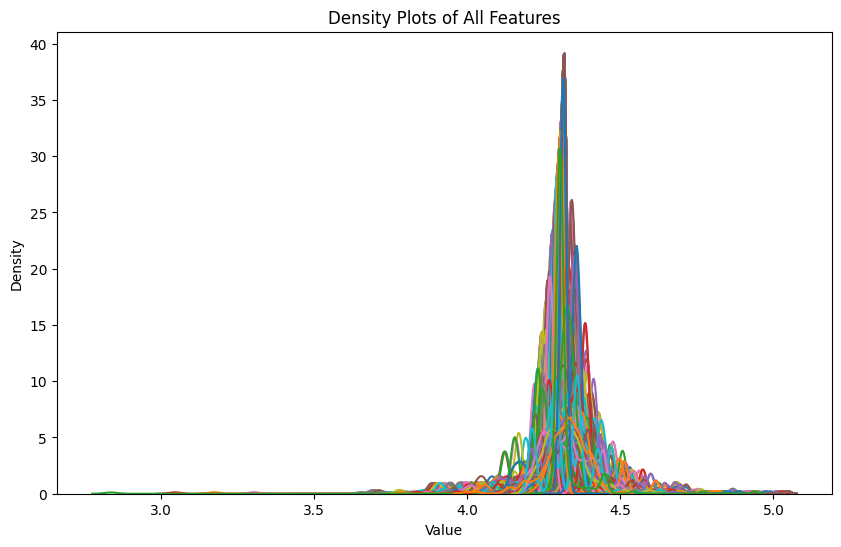

In [19]:
plt.figure(figsize=(10, 6))

# Plotting density of multiple features
for column in X_df.columns:
    sns.kdeplot(np.log2(X_df[column] + 20), bw_adjust=0.5, label=column)

plt.xlabel('Value')
plt.ylabel('Density')
plt.title('Density Plots of All Features')
#plt.legend()  # You might want to skip this for readability with many features
plt.show()

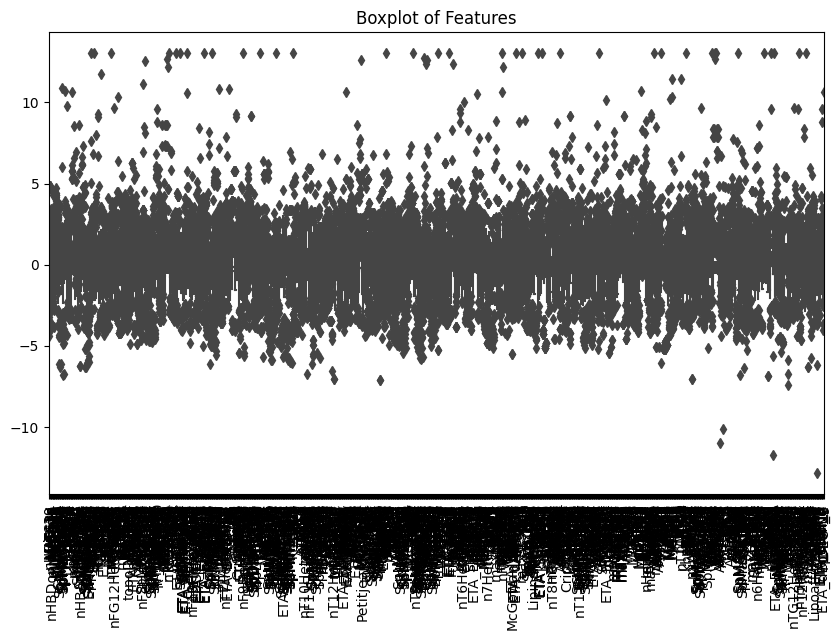

In [17]:
plt.figure(figsize=(10, 6))
sns.boxplot(data=X_df)
plt.xticks(rotation=90)  # Rotates the feature names for better readability
plt.title('Boxplot of Features')
plt.show()

In [7]:
from sklearn.model_selection import train_test_split
import tensorflow as tf


In [36]:
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y_binary, train_size=0.6, shuffle=True, random_state=37)

print("X_train shape - ", X_train.shape)
print("y_train shape - ", y_train.shape)

X_train shape -  (102, 1203)
y_train shape -  (102,)


In [11]:
tf.random.set_seed(37)

model = tf.keras.models.Sequential([
    tf.keras.layers.Dense(units=1024, activation="relu", kernel_regularizer= tf.keras.regularizers.l2(0.01)),
    tf.keras.layers.BatchNormalization(),
    tf.keras.layers.Dropout(0.7),
    tf.keras.layers.Dense(units=512, activation="relu",kernel_regularizer= tf.keras.regularizers.l2(0.01)),
    tf.keras.layers.BatchNormalization(),
    tf.keras.layers.Dropout(0.7),
    tf.keras.layers.Dense(units=1024, activation="relu", kernel_regularizer= tf.keras.regularizers.l2(0.01)),
    tf.keras.layers.BatchNormalization(),
    tf.keras.layers.Dropout(0.7),
    
    tf.keras.layers.Dense(units=1024, activation="relu",kernel_regularizer= tf.keras.regularizers.l2(0.01)),
    tf.keras.layers.BatchNormalization(),
    tf.keras.layers.Dropout(0.5),
    tf.keras.layers.Dense(units=1024, activation="relu",kernel_regularizer= tf.keras.regularizers.l2(0.01)),
    tf.keras.layers.BatchNormalization(),
    tf.keras.layers.Dropout(0.5),
    tf.keras.layers.Dense(units=512, activation="relu",kernel_regularizer= tf.keras.regularizers.l2(0.01)),
    tf.keras.layers.BatchNormalization(),
    tf.keras.layers.Dense(units=256, activation="relu",kernel_regularizer= tf.keras.regularizers.l2(0.01)),
    tf.keras.layers.Dense(units=1, activation="linear"),   
])

In [72]:
model.compile(optimizer=tf.keras.optimizers.Adam(learning_rate=1e-5),
              loss=BinaryCrossentropy(from_logits=True),
              metrics=['accuracy'])

In [73]:
model.fit(X_train, y_train, epochs=30)

Epoch 1/30
4/4 [==============================] - 3s 61ms/step - loss: 56.4047 - accuracy: 0.5098
Epoch 2/30
4/4 [==============================] - 0s 59ms/step - loss: 56.3705 - accuracy: 0.5098
Epoch 3/30
4/4 [==============================] - 0s 60ms/step - loss: 56.3944 - accuracy: 0.4412
Epoch 4/30
4/4 [==============================] - 0s 59ms/step - loss: 56.3446 - accuracy: 0.5000
Epoch 5/30
4/4 [==============================] - 0s 60ms/step - loss: 56.3340 - accuracy: 0.5784
Epoch 6/30
4/4 [==============================] - 0s 60ms/step - loss: 56.3391 - accuracy: 0.5490
Epoch 7/30
4/4 [==============================] - 0s 62ms/step - loss: 56.3237 - accuracy: 0.4804
Epoch 8/30
4/4 [==============================] - 0s 60ms/step - loss: 56.3607 - accuracy: 0.5098
Epoch 9/30
4/4 [==============================] - 0s 60ms/step - loss: 56.3543 - accuracy: 0.4608
Epoch 10/30
4/4 [==============================] - 0s 59ms/step - loss: 56.3426 - accuracy: 0.4608
Epoch 11/30
4/4 [==

In [74]:
from sklearn.metrics import f1_score

y_pred = (model.predict(X_test) > 0.5).astype("int32")

f1 = f1_score(y_test, y_pred)

print("F1 Score:", f1)

3/3 [==============================] - 0s 7ms/step
F1 Score: 0.0


In [25]:
pca = PCA(n_components=0.80)  # Retain 90% of the variance
X_pca = pca.fit_transform(X_t)

In [26]:
X_pca_train, X_pca_test, y_pca_train, y_pca_test = train_test_split(X_pca, y, test_size=0.3, random_state=37)

In [27]:
model_pca = tf.keras.models.Sequential([
    tf.keras.layers.Dense(512, activation='relu', input_shape=(X_pca_train.shape[1],)),
    tf.keras.layers.Dropout(0.2),
    tf.keras.layers.Dense(256, activation='relu'),
    tf.keras.layers.Dropout(0.2),
    tf.keras.layers.Dense(1, activation='sigmoid')  
])



In [28]:
def f1_score(y_true, y_pred):
    def recall(y_true, y_pred):
        true_positives = K.sum(K.round(K.clip(y_true * y_pred, 0, 1)))
        possible_positives = K.sum(K.round(K.clip(y_true, 0, 1)))
        recall = true_positives / (possible_positives + K.epsilon())
        return recall

    def precision(y_true, y_pred):
        true_positives = K.sum(K.round(K.clip(y_true * y_pred, 0, 1)))
        predicted_positives = K.sum(K.round(K.clip(y_pred, 0, 1)))
        precision = true_positives / (predicted_positives + K.epsilon())
        return precision

    precision = precision(y_true, y_pred)
    recall = recall(y_true, y_pred)
    return 2*((precision*recall)/(precision+recall+K.epsilon()))

# When compiling the model, add the custom F1 score metric
model_pca.compile(optimizer=tf.keras.optimizers.Adam(learning_rate=1e-5),
                  loss=tf.keras.losses.BinaryCrossentropy(from_logits=False),
                  metrics=[f1_score])

In [31]:
y_true_binary = np.where(y_pca_test == 'Toxic', 1, 0)

# Predict and binarize the outputs
y_pred = (model_pca.predict(X_pca_test) > 0.5).astype(int)

# Calculate the F1 score
f1 = f1_score(y_true_binary, y_pred)

print("F1 Score:", f1)

2/2 [==============================] - 0s 1ms/step
F1 Score: 0.39999999999999997
